<a href="https://colab.research.google.com/github/Shristi1104/GREENHOUSE-GAS-PREDICTION/blob/main/greenhouse_gas_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("co2_emissions.csv")
print(df.head())  # Check first 5 rows
print(df.describe())  # Summary stats
print(df.isnull().sum())  # Missing values

   Country  Year  CO2 Emissions   GDP  Population  Energy Use
0    India  2010           1700   1.7        1200         450
1      USA  2010           5400  15.0         310        7000
2    China  2010           8000   6.0        1350        9500
3  Germany  2010            900   3.5          82        5000
4   Brazil  2010            500   2.1         195        1200
              Year  CO2 Emissions        GDP   Population   Energy Use
count     8.000000       8.000000   8.000000     8.000000     8.000000
mean   2010.375000    3993.750000   6.525000   753.625000  5038.750000
std       0.517549    3163.682021   5.682743   572.599071  3883.335965
min    2010.000000     500.000000   1.700000    82.000000   450.000000
25%    2010.000000    1500.000000   2.050000   281.250000  1015.000000
50%    2010.000000    3575.000000   4.750000   756.000000  6000.000000
75%    2011.000000    6125.000000   8.625000  1252.500000  7700.000000
max    2011.000000    8200.000000  15.500000  1360.000000  9

In [3]:
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

In [4]:
X = df.drop('CO2 Emissions', axis=1)  # Features (GDP, Population, etc.)
y = df['CO2 Emissions']  # Target (CO2 Emissions)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred_lr = model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Metrics
print("Linear Regression:")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R²: {r2_score(y_test, y_pred_lr)}")

print("\nRandom Forest:")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R²: {r2_score(y_test, y_pred_rf)}")

Linear Regression:
MSE: 7047.614573268558
R²: 0.9978839963750742

Random Forest:
MSE: 898801.0
R²: 0.7301404391067743


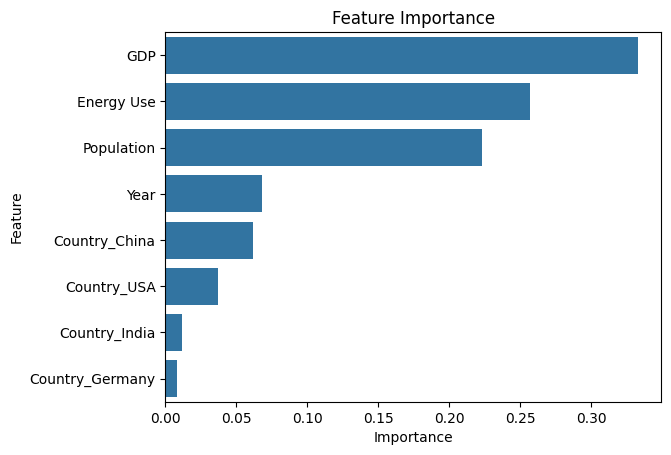

In [9]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance")
plt.show()